# Tutorial: Load and Sample Datasets

In this tutorial you will learn what are the different ways to load datasets, subsample them.

To run all cells, you need the `annotated-trainval` and `synthetic` datasets unzipped in `data/docile`.

In [2]:
!pwd

/Users/saucabadal/SiaTests/Dataset-v1/tutorials


In [3]:
from pathlib import Path
from docile.dataset import CachingConfig, Dataset
from PIL import Image

DATASET_PATH = Path("../data/docile/")

## Load from folder with unzipped dataset

By default, dataset is loaded with these settings:

* annotations and pre-computed OCR are loaded to memory
* images generated from PDFs are cached to disk (for faster access of the images in future iterations)

Below you see options how to change this default behaviour, which is especially useful for large datasets.

In [4]:
# Do NOT preload annotations, pre-computed OCR, nor document resources
trainval = Dataset("trainval", DATASET_PATH, load_annotations=False, load_ocr=False, cache_images=CachingConfig.OFF)
train = Dataset("train", DATASET_PATH, load_annotations=False, load_ocr=False, cache_images=CachingConfig.OFF)
val = Dataset("val", DATASET_PATH, load_annotations=False, load_ocr=False, cache_images=CachingConfig.OFF)
synthetic = Dataset("synthetic", DATASET_PATH, load_annotations=False, load_ocr=False, cache_images=CachingConfig.OFF)

Initializing documents for docile:synthetic: 100%|█████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:02<00:00, 39043.43it/s]


## Sample documents

For experiments and to work with large datasets, it can be useful to take samples of the datasets.

For this, you can use slicing `[start:end:step]`, `.sample()`, `.get_cluster()` or `.from_documents()` methods.

Document(docile:003568b1286f4dab953fc2d5)
Number of pages: 2


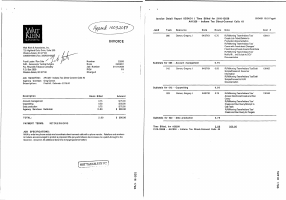

In [5]:
doc_idx = 4
dataset = trainval
sample_doc_trainval = dataset[doc_idx]
print(sample_doc_trainval)
print(f'Number of pages: {sample_doc_trainval.page_count}')
#sample_doc_trainval.page_image(page=0, image_size=(400, None))

imgs = [sample_doc_trainval.page_image(page=p, image_size=(None, 200)) for p in range(sample_doc_trainval.page_count)]
concat_img = Image.new("RGB", (sum(img.width for img in imgs), 200))
start_from = 0
for img in imgs:
    concat_img.paste(img, (start_from, 0))
    start_from += img.width
concat_img

**Documents belonging to the same cluster**

Found 14 documents in trainval belonging to the same cluster as synthetic-04cb9c50d4c949598689ea6f-000
Cluster: Dataset(docile:trainval[cluster_id=853])
Showing 10 images (first page of each document) from the cluster:


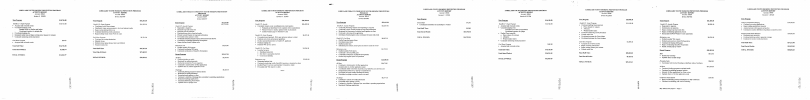

In [13]:
# Synthetic document has 100 chunks of 1000 documents from the same template document,
# i.e., documents from 0 to 999 belong to the first document template, 
#       documents from 1000 to 1999 belong to the second document template, and so on.

doc_idx = 1000
trainval_cluster = trainval.get_cluster(synthetic[doc_idx].annotation.cluster_id)

from PIL import Image

print(f'Found {len(trainval_cluster)} documents in trainval belonging to the same cluster as {synthetic[doc_idx].docid}')
print(f'Cluster: {trainval_cluster}')
print("Showing 10 images (first page of each document) from the cluster:")
imgs = [doc.page_image(page=0, image_size=(None, 100)) for doc in trainval_cluster[:10]]
concat_img = Image.new("RGB", (sum(img.width for img in imgs), 100))
start_from = 0
for img in imgs:
    concat_img.paste(img, (start_from, 0))
    start_from += img.width
concat_img

## Extracting text from the pdfs (using UnstructuredFileLoader)

In [1]:
from langchain.document_loaders import UnstructuredFileLoader

In [52]:
sample_doc = trainval[6]
print(sample_doc.docid)

doc_loader = UnstructuredFileLoader("../data/docile/pdfs/"+sample_doc.docid+'.pdf', mode="elements")
docs = doc_loader.load()

003cc91637994b7d9566ac41


In [53]:
imgs = [sample_doc.page_image(page=p, image_size=(None, 600)) for p in range(sample_doc.page_count)]
concat_img = Image.new("RGB", (sum(img.width for img in imgs), 600))
start_from = 0
for img in imgs:
    concat_img.paste(img, (start_from, 0))
    start_from += img.width
    
docs[0].page_content

'POWELL, GOLDSTEIN, FRAZER & MURPHY LLP Sixth Floor'

**---- UnstructuredFileLoader fails to extract the page context of the pdfs loaded ----**

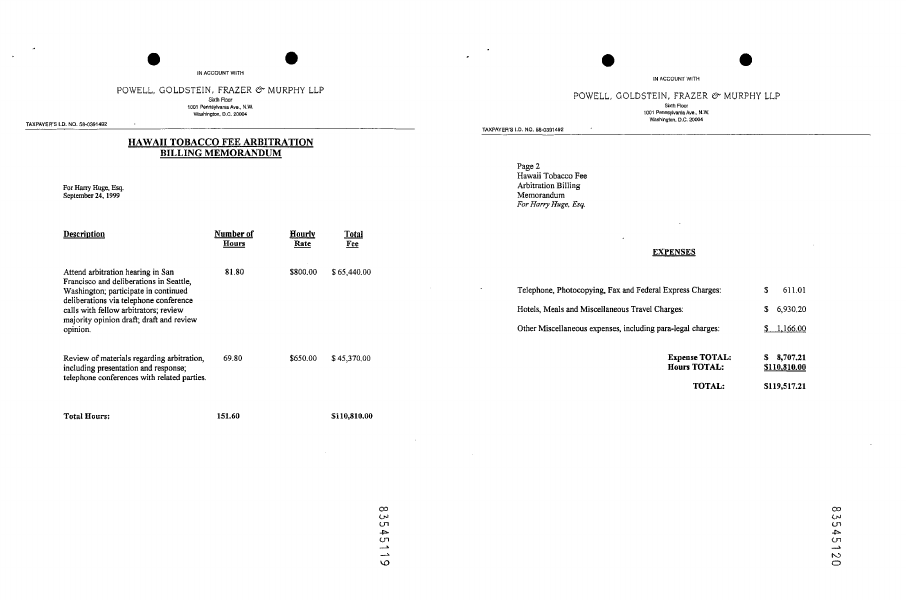

In [54]:
concat_img

### Example with synthetic docs

In [59]:
sample_doc = synthetic[10]
print(sample_doc.docid)

doc_loader = UnstructuredFileLoader("../data/docile/pdfs/"+sample_doc.docid+'.pdf', mode="elements")
docs = doc_loader.load()

imgs = [sample_doc.page_image(page=p, image_size=(None, 1000)) for p in range(sample_doc.page_count)]
concat_img = Image.new("RGB", (sum(img.width for img in imgs), 1000))
start_from = 0
for img in imgs:
    concat_img.paste(img, (start_from, 0))
    start_from += img.width
    
docs[0].page_content

synthetic-02a50adccac54a569011f167-010


'07/10/2010 07/08/2009 05/11/2013 04/06/2014 11/13/2005 07/29/2016 06/15/2017 03/26/2010 09/27/2017 05/05/2022 12/15/2021 01/09/2007 02/04/2002 09/08/2005 09/23/2021 01/11/2021 07/01/2003 09/25/2012'

**----  It also fails to extract the text correctly ----**

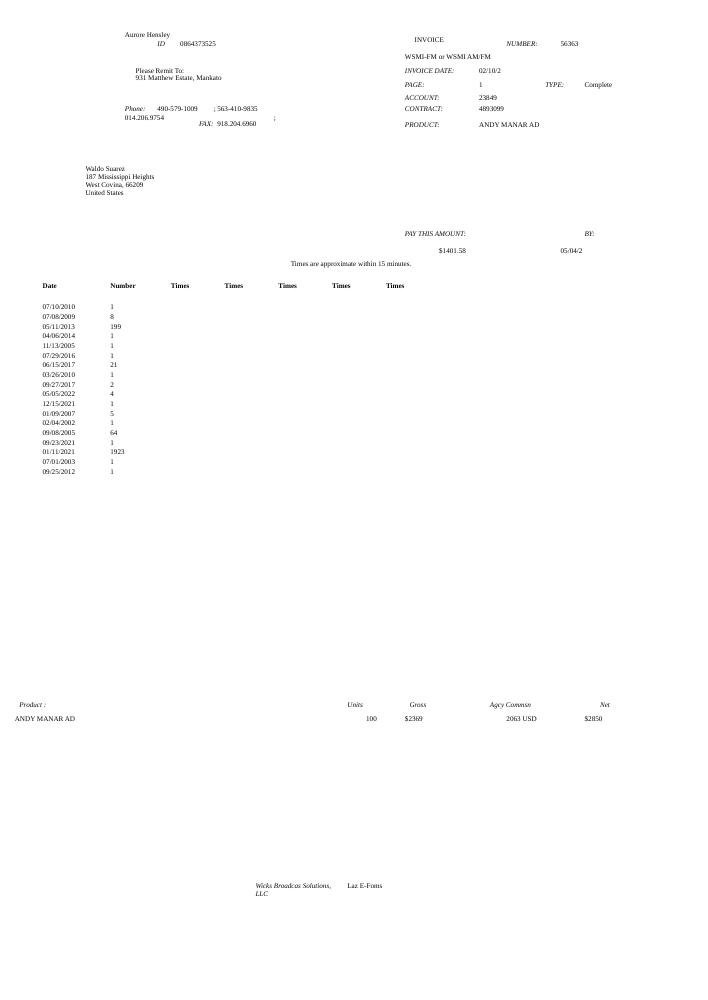

In [60]:
concat_img

### Trying to extract the text using PagedPDFSplitter

In [61]:
from langchain.document_loaders import PagedPDFSplitter

synthetic-02a50adccac54a569011f167-010
page 0: page_content='490-579-1009  563-410-9835  Phone:  ; \n918.204.6960  F AX:  Please Remit To:\n931 Matthew Estate, Mankato  Aurore Hensley  \n0864373525  \n014.206.9754  ID \n; INVOICE  NUMBER:  56363  \nANDY MANAR AD  PRODUCT:  INVOICE DATE:  02/10/2  \nCONTRACT:  4893099  ACCOUNT:  23849  Complete  TYPE:  P AGE:  1 WSMI-FM or WSMI AM/FM  \nWaldo Suarez\n187 Mississippi Heights\nWest Covina, 66209\nUnited States  \nP AY THIS AMOUNT:  \n$1401.58  05/04/2  BY: \nTimes are approximate within 15 minutes.  \nANDY MANAR AD  Product :  Agcy Commsn  \n2063 USD  $2850  Net \n$2369  Gross  Units  \n100 \nWicks Broadcas Solutions,\nLLC Laz E-Foms  Date Number Times Times Times Times Times\n07/10/2010  1 \n07/08/2009  8 \n05/11/2013  199 \n04/06/2014  1 \n11/13/2005  1 \n07/29/2016  1 \n06/15/2017  21 \n03/26/2010  1 \n09/27/2017  2 \n05/05/2022  4 \n12/15/2021  1 \n01/09/2007  5 \n02/04/2002  1 \n09/08/2005  64 \n09/23/2021  1 \n01/11/2021  1923  \n07

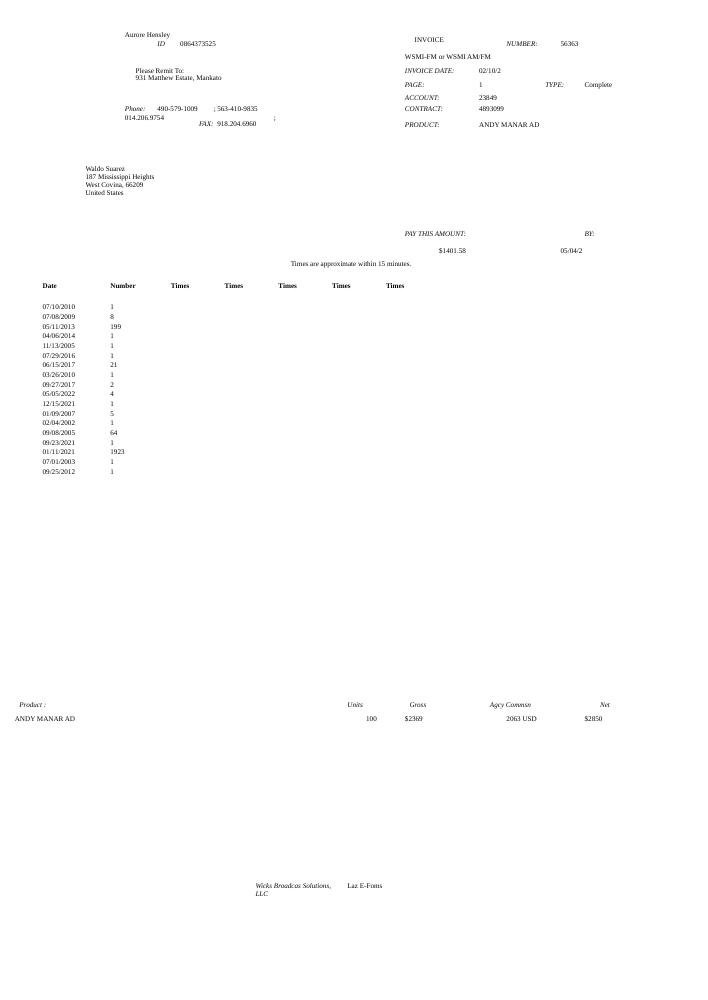

In [68]:
sample_doc = synthetic[10]
print(sample_doc.docid)
doc_loader = PagedPDFSplitter("../data/docile/pdfs/"+sample_doc.docid+'.pdf')
pages = doc_loader.load_and_split()

imgs = [sample_doc.page_image(page=p, image_size=(None, 1000)) for p in range(sample_doc.page_count)]
concat_img = Image.new("RGB", (sum(img.width for img in imgs), 1000))
start_from = 0
for img in imgs:
    concat_img.paste(img, (start_from, 0))
    start_from += img.width

idx = 0
print(f'page {idx}: {pages[idx]}')
print()
concat_img

synthetic-04cb9c50d4c949598689ea6f-000
page 0: page_content='Invoice  412423  # : Account:  18784  Neil Chang  \nACTIVITY REPORT  \nTotal Out-of-Pocket:  $2413  \nTOTAL INVOICE:  $491.3  \n0\n9\nX\nE\nZ\n3\nP\nD TeenH.I.P. Grant Program $10,716.00\nBerliet-5802 YE  0.03 \nAirbus 752  1.49 \nBoeing 516  0.00 \nAirbus 222  1.57 \nChevrolet Volt  0.00 \nGAZ-8355 HN  0.00 \nFord F-Series  0.00 \nLancia Ypsilon  0.00 \nHolden Commodore  388.88  \nAirbus 969  94.85  \nPegaso-9616 GA  0.00 \nJaguar XJ  0.00 \nBoeing 385  0.00 \nTu 056  0.00 \nChevrolet Impala  0.00 \nSmart Fortwo  0.02 \nBoeing 454  0.00 \nDodge Coronet  0.00 \nTu 955  0.00 \nTu 987  0.00 \nBoeing 935  1.04 \nTu 894  0.00 \nOtokar-4775 GR  0.00 \nCadillac De Ville  0.00 \nVolvo 200 Series  2.02 \nJiefang-2551 FM  1.05 \nGrube-9908 IB  0.35 \nMcCrud-6850 YC  0.00 \nPraga-6964 ZN  0.00 \nMazda-0596 CF  0.00 \nTu 690  0.00' lookup_str='' metadata={'source': '../data/docile/pdfs/synthetic-04cb9c50d4c949598689ea6f-000.pdf', 'page'

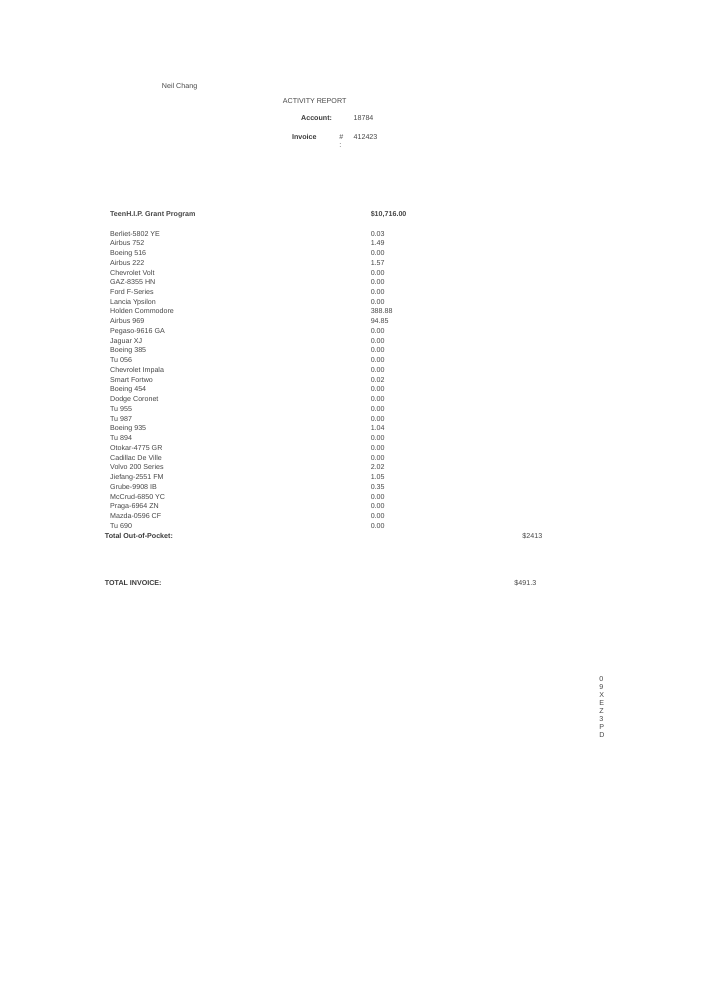

In [69]:
sample_doc = synthetic[1000]
print(sample_doc.docid)
doc_loader = PagedPDFSplitter("../data/docile/pdfs/"+sample_doc.docid+'.pdf')
pages = doc_loader.load_and_split()

imgs = [sample_doc.page_image(page=p, image_size=(None, 1000)) for p in range(sample_doc.page_count)]
concat_img = Image.new("RGB", (sum(img.width for img in imgs), 1000))
start_from = 0
for img in imgs:
    concat_img.paste(img, (start_from, 0))
    start_from += img.width

idx = 0
print(f'page {idx}: {pages[idx]}')
print()
concat_img

**---- It seems that using PagedPDFSplitter extracts the text much better than using UnstructuredFileLoader ----**